In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [18]:
df_pib_bovino = pd.read_excel("../Rebanho-bovino/PIB Estadual(valor adicionado a preços básicos)-agropecuária(preços de 2010).xls")
df_pib_bovino.head()

,Sigla,Codigo,Estado,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AC,12,Acre,7.370000e+04,7.657078e+04,9.348004e+04,5.401680e+05,6.349080e+05,5.325946e+05,5.917028e+05,...,7.963776e+05,8.186869e+05,9.404131e+05,9.773460e+05,9.234033e+05,9.247506e+05,8.213087e+05,7.095160e+05,5.871296e+05,5.190225e+05
1,AL,27,Alagoas,5.414188e+05,6.743504e+05,6.906043e+05,4.700566e+06,3.638393e+06,3.344145e+06,3.279269e+06,...,2.797560e+06,2.537031e+06,2.780490e+06,3.044846e+06,3.337332e+06,4.283424e+06,5.197034e+06,4.758060e+06,5.315222e+06,6.660981e+06
2,AM,13,Amazonas,4.050340e+05,3.920318e+05,3.926406e+05,2.354165e+06,2.069585e+06,1.798062e+06,1.528901e+06,...,3.982128e+06,3.530477e+06,4.109752e+06,3.821948e+06,3.973130e+06,3.730174e+06,3.429211e+06,3.229546e+06,2.792752e+06,2.698961e+06
3,AP,16,Amapá,8.595410e+04,8.652614e+04,1.004754e+05,7.825053e+04,6.594352e+04,8.285388e+04,1.805758e+05,...,2.046232e+05,2.341466e+05,2.020176e+05,1.986728e+05,1.847483e+05,1.836460e+05,1.902460e+05,1.721740e+05,1.749256e+05,1.793728e+05
4,BA,29,Bahia,3.924428e+06,4.764487e+06,4.625687e+06,1.256136e+07,1.267423e+07,1.343789e+07,1.112259e+07,...,1.097348e+07,1.092964e+07,1.042356e+07,1.142224e+07,1.224443e+07,1.048879e+07,9.684740e+06,1.118264e+07,9.826033e+06,1.477962e+07


In [19]:
instancia_pib_bovino_para = df_pib_bovino[df_pib_bovino["Estado"] == "Pará"]


In [20]:
para_km = 1247954.666

instancia = instancia_pib_bovino_para.columns[3:]
for i , linha in instancia_pib_bovino_para.iterrows():
    if i >= 3:
        instancia_pib_bovino_para_km= (linha[instancia]/para_km)

In [28]:
data = []
for valor in instancia_pib_bovino_para_km:
    data.append({'PIB Agropecuário/km²': valor})
df_pib_bovino_para = pd.DataFrame(data)
df_pib_bovino_para.head()

,PIB Agropecuário/km²
0,3.352224
1,3.317018
2,3.536271
3,5.275914
4,5.379826


In [24]:
with pd.ExcelWriter("PIB Agropecuário-km.xlsx") as writer:
    df_pib_bovino_para.to_excel(writer, index=False)

In [27]:
df_geral = pd.read_excel("../Produção de Milho(R$)km + Produção Rebanho Bovino(R$)km + Produção de Soja(R$) + desmatamento.xlsx")
df_geral.head()

,year,area km²,uf,Produção Milho (R$)/km²,Produção Rebanho Bovino(R$)/km²,Produção Soja(R$)/km²
0,1999,5111,Pará,0.230019,7.101740,0.001512
1,2000,6671,Pará,0.222992,8.230595,0.001311
2,2001,5237,Pará,0.200854,8.852078,0.001431
3,2002,7510,Pará,0.217638,9.768461,0.006709
4,2003,7145,Pará,0.307445,10.718824,0.027874


In [31]:
X = df_geral[["Produção Rebanho Bovino(R$)/km²"]]
y = df_pib_bovino_para

In [32]:
print(f'->{X.shape}')
print(f'->{y.shape}')

->(22, 1)
->(22, 1)


In [33]:
modelo = LinearRegression()  
modelo.fit(X, y)  

LinearRegression()

In [34]:
y_pred = modelo.predict(X)  

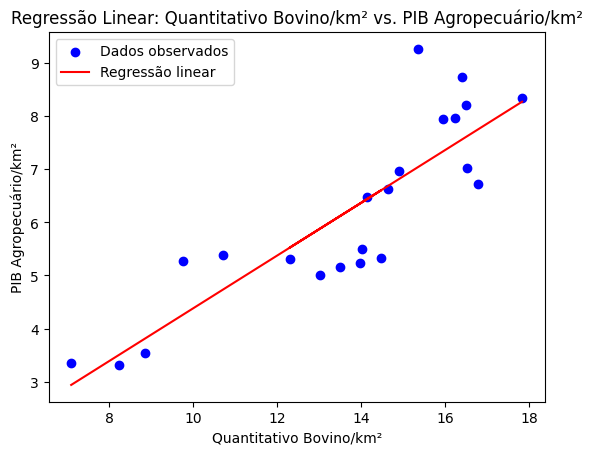

In [35]:
plt.scatter(X, y, color='blue', label='Dados observados')  # Dados reais
plt.plot(X, y_pred, color='red', label='Regressão linear')  # Linha de regressão
plt.xlabel("Quantitativo Bovino/km²")
plt.ylabel("PIB Agropecuário/km²")
plt.title("Regressão Linear: Quantitativo Bovino/km² vs. PIB Agropecuário/km²")
plt.legend()
plt.show()

In [40]:
X = df_geral[["area km²"]]
y = df_pib_bovino_para

In [41]:
print(f'->{X.shape}')
print(f'->{y.shape}')

->(22, 1)
->(22, 1)


In [42]:
modelo = LinearRegression()  
modelo.fit(X, y)  

LinearRegression()

In [43]:
y_pred = modelo.predict(X)  

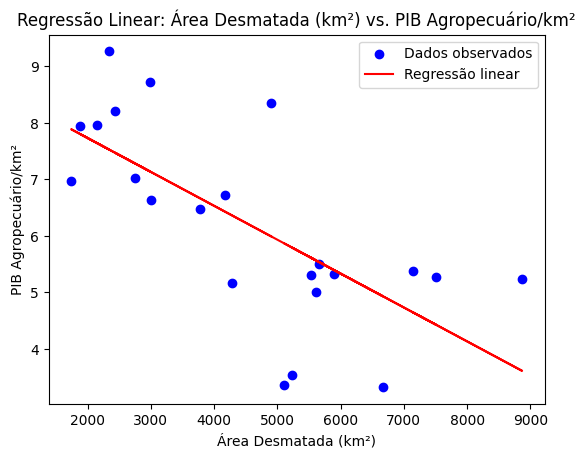

In [44]:
plt.scatter(X, y, color='blue', label='Dados observados')  # Dados reais
plt.plot(X, y_pred, color='red', label='Regressão linear')  # Linha de regressão
plt.xlabel("Área Desmatada (km²)")
plt.ylabel("PIB Agropecuário/km²")
plt.title("Regressão Linear: Área Desmatada (km²) vs. PIB Agropecuário/km²")
plt.legend()
plt.show()